<div style="
    background-color: #0b2343; 
    color: white; 
    padding: 25px; 
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 24px; font-weight: normal;">
        Data Analytics & Machine Learning in Finance
    </h2>
    <h1 style="margin: 5px 0 0 0; font-size: 48px; font-weight: bold;">
        Exam
    </h1>
    <p style="margin: 8px 0 0 0; font-size: 18px;">
        Pedro Ramón Ventura Gómez
    </p>
    <p style="margin: 2px 0 0 0; font-size: 16px;">
        pventura@march-am.com
    </p>
</div>


# Clustering

**Objectives**

- Understand the basic concepts of clustering (unsupervised grouping) and its application in finance.
- Learn to use the K-Means and hierarchical clustering (HAC) algorithms to group investment funds based on quantitative characteristics.
- Learn to use the GraphExt tool (https://www.graphext.com).
- Practice cleaning and preprocessing financial data (historical fund prices).
- Extract quantitative characteristics of the assets and understand their financial meaning.
- Apply PCA and K-Means to these characteristics to identify clusters of similar funds.
- Visualize clustering results to interpret the groups.
- Provide a financial interpretation of the clusters and discuss findings.

**Structure**

- Presentation: Overview of objectives.
- Data cleaning and preprocessing: Load the historical fund price dataset, identify missing or anomalous data, and apply cleaning techniques.
- Feature engineering: Compute quantitative variables and prepare the feature matrix for clustering.
- Application of PCA (Principal Component Analysis): Dimensionality reduction.
- K-Means and HAC algorithms: Clustering with different methods.
- Discussion of results and conclusions: Findings and cluster interpretation.

**Financial Thesis**

As portfolio managers, we believe the Asian market will perform well next year; therefore, we aim to position our fund of funds with a clear bias toward this market.

**Dataset**

- Net Asset Values (NAVs) of 25,000 investment funds between 2016-01-05 and 2021-07-16 provided by IronIA.
- Fama & French factors (Mkt-RF, SMB, HML, MOM) for Asia Pacific ex Japan.
- Net asset values of iShares MSCI All Country Asia ex Japan ETF (AAXJ). Its use for feature extraction is strictly forbidden. It will only be used as a TEST at the end of the exercise.


## Data reading

### Funds NAV

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import missingno as mso
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read raw data from pickle file.
raw_data = pkl.load(open("../dataset/navs.pickle", "rb"))

C:\Users\pventura\AppData\Local\Temp\ipykernel_27888\2370445564.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  raw_data = pkl.load(open("../dataset/navs.pickle", "rb"))


In [3]:
# Examine raw_data.
type(raw_data)

dict

In [4]:
# It is a dictionary. Let's look at the keys.
raw_data.keys()

dict_keys([90, 541, 909, 915, 922, 1625, 1626, 1905, 3395, 6214, 6215, 6216, 6217, 6218, 6219, 6220, 6221, 6343, 6344, 6345, 6346, 6353, 6362, 6366, 6369, 6370, 6376, 6395, 6396, 6405, 6406, 6420, 6427, 6434, 6436, 6437, 6442, 6445, 6454, 6457, 6460, 6465, 6472, 6478, 6479, 6484, 6491, 6499, 6506, 6519, 6536, 6541, 6542, 6543, 6544, 6578, 6579, 6583, 6584, 6685, 8004, 8006, 8008, 8010, 8011, 8012, 8013, 8015, 8022, 8024, 8026, 8030, 8033, 8034, 8035, 8037, 8049, 8050, 8051, 8052, 8053, 8054, 8055, 8056, 8057, 8058, 8059, 8061, 8062, 8063, 8064, 8067, 8068, 8069, 8072, 8073, 8074, 8075, 8076, 8077, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8087, 8088, 8089, 8091, 8101, 8102, 8103, 8104, 8105, 8106, 8108, 8109, 8110, 8113, 8114, 8118, 8119, 8120, 8121, 8123, 8124, 8125, 8126, 8239, 8242, 9807, 9808, 10001, 10003, 10011, 10013, 10015, 10016, 10017, 10020, 10322, 10783, 10784, 11002, 11008, 11010, 11011, 11013, 11019, 11020, 11021, 11027, 11028, 11029, 11032, 11035, 11039, 11041, 11042, 11

In [5]:
# Let's look at one key.
raw_data[90]

,isin,allfunds_id,nav,name
date,,,,
2016-01-05,LU0171310443,90,16.47,"BGF WORLD TECHNOLOGY ""A2"" (EUR)"
2016-01-06,LU0171310443,90,16.19,"BGF WORLD TECHNOLOGY ""A2"" (EUR)"
2016-01-07,LU0171310443,90,15.68,"BGF WORLD TECHNOLOGY ""A2"" (EUR)"
2016-01-08,LU0171310443,90,15.59,"BGF WORLD TECHNOLOGY ""A2"" (EUR)"
2016-01-11,LU0171310443,90,15.26,"BGF WORLD TECHNOLOGY ""A2"" (EUR)"
...,...,...,...,...
2021-07-12,LU0171310443,90,70.55,"BGF WORLD TECHNOLOGY ""A2"" (EUR) (FR)"
2021-07-13,LU0171310443,90,70.85,"BGF WORLD TECHNOLOGY ""A2"" (EUR)"
2021-07-14,LU0171310443,90,71.19,"BGF WORLD TECHNOLOGY ""A2"" (EUR)"


In [6]:
# We have a dictionary of DataFrames.
# We assume all DataFrames share the same structure.
# They have a DatetimeIndex and column dtypes do not need transformation.
raw_data[90].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1387 entries, 2016-01-05 to 2021-07-16
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isin         1387 non-null   object 
 1   allfunds_id  1387 non-null   int64  
 2   nav          1387 non-null   float64
 3   name         1387 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 54.2+ KB


In [7]:
# Concatenate all DataFrames row-wise given their shared structure.
# Then reshape from long to wide.
data_nav = pd.concat(raw_data.values(), axis=0)
data_nav = data_nav.reset_index()
data_nav = data_nav.pivot_table(
    index="date",
    columns="isin",
    values="nav",
    aggfunc="first",
)
data_nav.shape

(2020, 24819)

In [8]:
data_nav.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2020 entries, 2016-01-05 to 2021-07-16
Columns: 24819 entries, AT0000494893 to NL0006238131
dtypes: float64(24819)
memory usage: 382.5 MB


### Fama & French Factors

Ref.: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [9]:
data_asia_pacific_ex_japan_3_factors_daily = pd.read_csv(
    "../dataset/Asia_Pacific_ex_Japan_3_Factors_Daily.csv",
    index_col="Date",
    parse_dates=True,
)
data_asia_pacific_ex_japan_3_factors_daily = data_asia_pacific_ex_japan_3_factors_daily / 100
data_asia_pacific_ex_japan_3_factors_daily

,Mkt-RF,SMB,HML,RF
Date,,,,
1990-07-02,0.0040,-0.0009,0.0060,0.0003
1990-07-03,0.0086,-0.0064,0.0030,0.0003
1990-07-04,0.0128,-0.0029,-0.0030,0.0003
1990-07-05,0.0020,-0.0057,-0.0034,0.0003
1990-07-06,-0.0007,-0.0016,0.0042,0.0003
...,...,...,...,...
2025-03-25,0.0003,0.0002,-0.0025,0.0002
2025-03-26,0.0040,-0.0007,-0.0015,0.0002
2025-03-27,0.0021,-0.0028,0.0058,0.0002


In [10]:
data_asia_pacific_ex_japan_3_factors_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9066 entries, 1990-07-02 to 2025-03-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  9066 non-null   float64
 1   SMB     9066 non-null   float64
 2   HML     9066 non-null   float64
 3   RF      9066 non-null   float64
dtypes: float64(4)
memory usage: 354.1 KB


In [11]:
data_asia_pacific_ex_japan_3_factors_daily.describe()

,Mkt-RF,SMB,HML,RF
count,9066.000000,9066.000000,9066.000000,9066.000000
mean,0.000253,-0.000165,0.000247,0.000099
std,0.010334,0.005685,0.005512,0.000089
min,-0.103200,-0.056900,-0.037200,0.000000
25%,-0.004600,-0.003000,-0.002800,0.000000
50%,0.000400,0.000000,0.000200,0.000100
75%,0.005500,0.003000,0.003100,0.000200
max,0.100000,0.049000,0.051100,0.000300


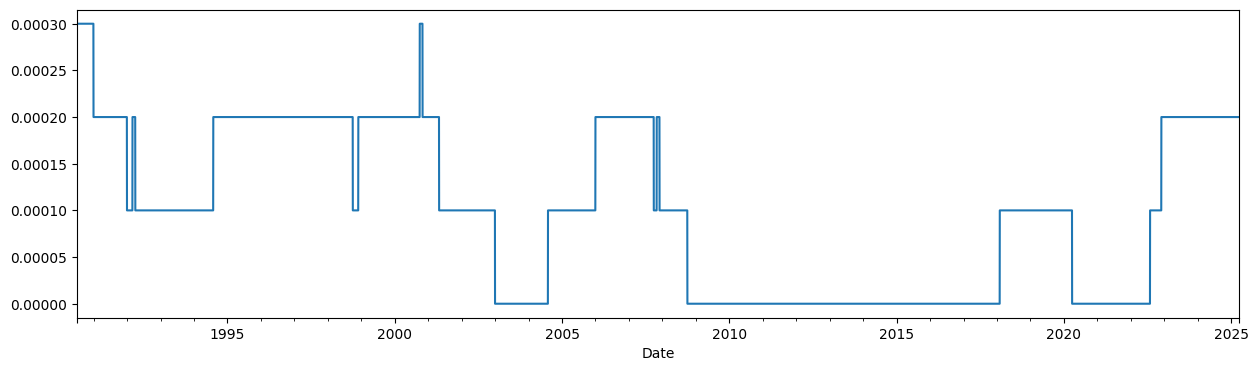

In [12]:
data_asia_pacific_ex_japan_3_factors_daily.loc[:, "RF"].plot(figsize=(15, 4))
plt.show()

In [13]:
data_asia_pacific_ex_japan_MOM_factor_daily = pd.read_csv(
    "../dataset/Asia_Pacific_ex_Japan_MOM_Factor_Daily.csv",
    index_col="Date",
    parse_dates=True,
)
data_asia_pacific_ex_japan_MOM_factor_daily.columns = ["MOM"]
data_asia_pacific_ex_japan_MOM_factor_daily = data_asia_pacific_ex_japan_MOM_factor_daily / 100
data_asia_pacific_ex_japan_MOM_factor_daily

,MOM
Date,
1990-11-01,0.0072
1990-11-02,0.0096
1990-11-05,-0.0141
1990-11-06,-0.0013
1990-11-07,0.0001
...,...
2025-03-25,0.0018
2025-03-26,0.0029
2025-03-27,0.0011


In [14]:
data_asia_pacific_ex_japan_MOM_factor_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8978 entries, 1990-11-01 to 2025-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOM     8978 non-null   float64
dtypes: float64(1)
memory usage: 140.3 KB


In [15]:
data_asia_pacific_ex_japan_MOM_factor_daily.describe()

,MOM
count,8978.000000
mean,0.000422
std,0.007403
min,-0.104200
25%,-0.002600
50%,0.000600
75%,0.004000
max,0.092800


## Data cleaning

## Filtering Asia Pacific ex-Japan Funds

## Features Engineering

* **Fund excess performance** relative to the Asian benchmark market ([Mkt - Rf] - [Fund - Rf]) at 1, 3, and 5 years.
* **Standard deviation** at 1, 3, and 5 years.
* **Up-Market Capture Ratio** at 1, 3, and 5 years: Measures relative performance versus the index during rising markets.  
    $ \text{Up-Market Capture Ratio}=\frac{\text{Portfolio return during Up-Market periods}}{\text{Benchmark return during Up-Market periods}} \times 100 $
* **Down-Market Capture Ratio** at 1, 3, and 5 years: Measures relative performance versus the index during declining markets.  
    $ \text{Down-Market Capture Ratio}=\frac{\text{Portfolio return during Down-Market periods}}{\text{Benchmark return during Down-Market periods}} \times 100 $
* **Beta** from regressions with the 4 factors at 1, 3, and 5 years.

## PCA + Clustering con KMeans

(66, 36)

## Hierarchical Agglomerative Clustering (HAC)